In [50]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [58]:
import seaborn as sns

Loading data from the API, separated the csv file to 4 separate files since Github is not able to store large files

In [51]:
import pandas as pd
df1 = pd.read_csv('https://raw.githubusercontent.com/Zaanis/AAPL-Predictor/main/AAPLFINAL1.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/Zaanis/AAPL-Predictor/main/AAPLFINAL2.csv')
df3 = pd.read_csv('https://raw.githubusercontent.com/Zaanis/AAPL-Predictor/main/AAPLFINAL3.csv')
df4 = pd.read_csv('https://raw.githubusercontent.com/Zaanis/AAPL-Predictor/main/AAPLFINAL4.csv')

### Loading Data

Combining the data together

In [3]:
df = pd.concat([df1, df2, df3, df4])

Getting timestamp to datatime and extract the hour

In [4]:
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])

In [5]:
df['Hour'] = df['TIMESTAMP'].dt.hour


Checking null values

In [6]:
df.isna().sum()

Unnamed: 0        0
TIMESTAMP         0
ROWNUM            0
OPEN              0
HIGH              0
LOW               0
CLOSE             0
VOLUME            0
RSI             342
MONTH             0
DOW               0
CHANGE            0
MOVEMENT          0
MACD           1849
MACD_HIST      1849
MACD_SIGNAL    1849
MA50           4312
MA5              10
VWAP              0
TARGET1           1
Hour              0
dtype: int64

Maximum of 4400 null values in MA50, which is only 1% of the data, will simply drop any rows with a missing value

In [7]:
df = df.dropna()

Dropping columns not needed

In [51]:
df = df.drop(columns = ['Unnamed: 0', 'ROWNUM', 'TIMESTAMP', 'TARGET1', 'MOVEMENT'])

In [52]:
df

,OPEN,HIGH,LOW,CLOSE,VOLUME,RSI,MONTH,DOW,CHANGE,MACD,MACD_HIST,MACD_SIGNAL,MA50,MA5,VWAP,Hour
43,0.226,0.230,0.226,0.229,17214400,55.5547,1,2,-0.003,0.0002,0.0001,0.0001,0.2252,0.2258,0.2251,13
44,0.229,0.230,0.228,0.229,9469600,71.0531,1,2,0.000,0.0004,0.0003,0.0001,0.2253,0.2264,0.2253,13
45,0.228,0.230,0.228,0.228,1696800,63.1484,1,2,0.000,0.0006,0.0003,0.0002,0.2253,0.2270,0.2253,13
46,0.228,0.230,0.225,0.226,14744800,63.1484,1,2,0.002,0.0006,0.0003,0.0003,0.2254,0.2274,0.2254,13
47,0.227,0.229,0.226,0.227,2480800,55.9318,1,2,0.000,0.0006,0.0003,0.0004,0.2255,0.2276,0.2254,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91791,178.730,178.750,178.533,178.585,487972,57.1998,10,2,0.145,-0.0083,0.0927,-0.1010,178.8217,178.6170,178.7920,15
91792,178.585,178.740,178.540,178.630,515934,52.2100,10,2,-0.045,-0.0007,0.0802,-0.0810,178.8037,178.6730,178.7896,15
91793,178.630,178.680,178.530,178.610,557809,53.5639,10,2,0.020,0.0088,0.0718,-0.0630,178.7866,178.6870,178.7865,15
91794,178.610,178.660,178.120,178.230,1652985,52.8473,10,2,0.380,0.0146,0.0621,-0.0475,178.7687,178.6690,178.7656,15


### Data Visualization

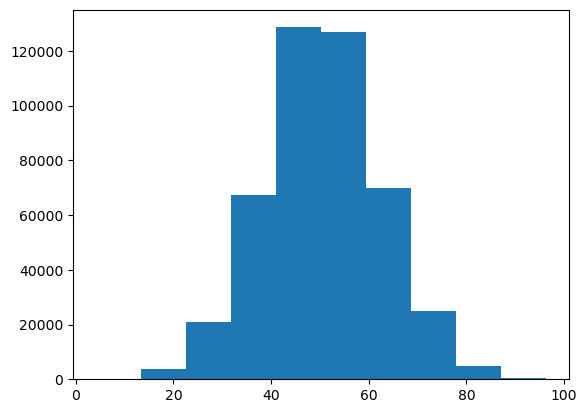

In [53]:
plt.hist(df['RSI'])
plt.show()

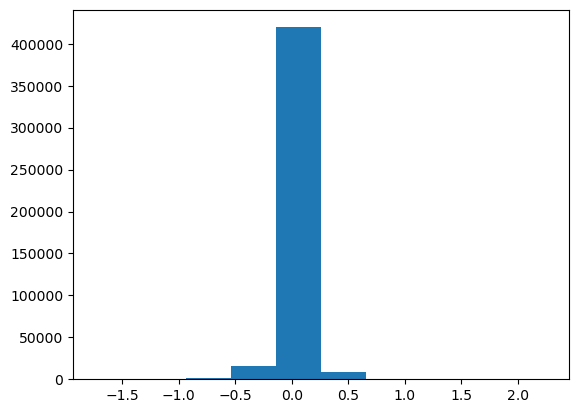

In [54]:
plt.hist(df['MACD'])
plt.show()

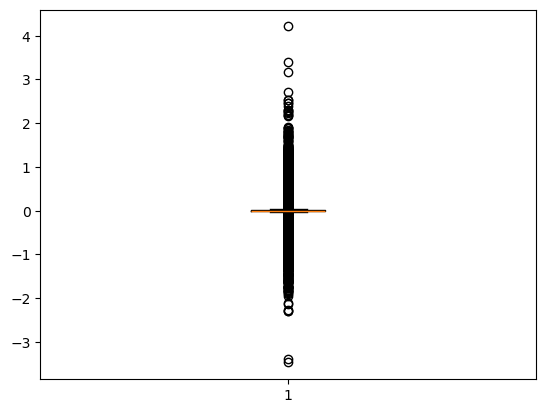

In [55]:
plt.boxplot(df['CHANGE'])
plt.show()

### Statistical Analysis on RSI
#### RSI measures how overbought and oversold a stock is, RSI  > 70 indicates overbought, RSI < 30 indicates oversold. We expect RSI > 70 to have negative average change while RSI < 30 to have positive average change.


Getting dataframe where RSI > 70 and RSI < 30. Getting the change in price to see if it matches what we hypothesize

In [8]:
rsi70 = df[df['RSI'] >= 70]
rsi30 = df[df['RSI'] <= 30]
rsiother = df[(df['RSI'] >= 70) | (df['RSI'] <= 30)]

In [9]:
print("Average Change in Price for RSI above 70: " + str(rsi70['CHANGE'].mean()))
print("Average Change in Price for RSI below 30: " + str(rsi30['CHANGE'].mean()))

Average Change in Price for RSI above 70: 0.0020375102375102426
Average Change in Price for RSI below 30: -0.0016285636413191876


In [10]:
from scipy.stats import ttest_ind, chisquare, normaltest
t_val, p_val = ttest_ind(rsi70['CHANGE'], rsi30['CHANGE'], alternative = 'greater')
p_val

0.0018388055061790331

It appears our understanding is wrong, although RSI greater than 70 indicates overbought, statistical analysis suggest that on average, it is still likely to go up more.

### Statistical Analysis on DOW
#### What DOW seems to have the biggest movement?

Filter data for Monday - Friday

In [11]:
mon = df[df['DOW'] == 1]
tues = df[df['DOW'] == 2]
wed = df[df['DOW'] == 3]
thurs = df[df['DOW'] == 4]
fri = df[df['DOW'] == 5]

Getting the Average Change for each DOW

In [12]:
print(mon['CHANGE'].mean())
print(tues['CHANGE'].mean())
print(wed['CHANGE'].mean())
print(thurs['CHANGE'].mean())
print(fri['CHANGE'].mean())

0.0008139613160710037
0.0023299712756234187
0.0021918428839296277
0.0021102089961116915
0.0020079242840241695


C:\Users\josh9\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\josh9\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\josh9\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\josh9\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_d

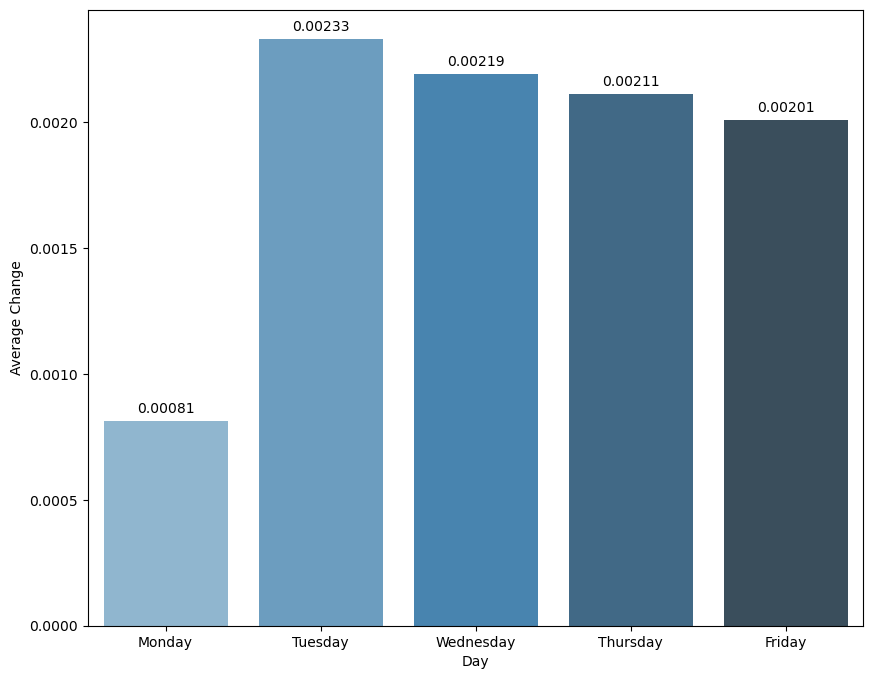

In [68]:
plt.figure(figsize=(10, 8))
y = [mon['CHANGE'].mean(), tues['CHANGE'].mean(), wed['CHANGE'].mean(),thurs['CHANGE'].mean(),fri['CHANGE'].mean()]
x = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
ax = sns.barplot(x=x, y=y, palette="Blues_d")

plt.xlabel('Day')
plt.ylabel('Average Change')

# Adding the value labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.5f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

# Displaying the plot
plt.show()

it appears that on Monday's, the change is significantly less than Tues - Fri

Testing statistical significant of the finding

In [56]:
t_val, p_val = ttest_ind(mon['CHANGE'], fri['CHANGE'], alternative = 'less')
p_val

0.0084494595940666

It is also statistically significant

### Statistical Analysis on Month
#### What month seems to have biggest movement?

In [14]:
jan = df[df['MONTH'] == 1]
feb = df[df['MONTH'] == 2]
mar = df[df['MONTH'] == 3]
apr = df[df['MONTH'] == 4]
may = df[df['MONTH'] == 5]
jun = df[df['MONTH'] == 6]
jul = df[df['MONTH'] == 7]
aug = df[df['MONTH'] == 8]
sep = df[df['MONTH'] == 9]
otb = df[df['MONTH'] == 10]
nov = df[df['MONTH'] == 11]
dec = df[df['MONTH'] == 12]

In [15]:
print(jan['CHANGE'].mean())
print(feb['CHANGE'].mean())
print(mar['CHANGE'].mean())
print(apr['CHANGE'].mean())
print(may['CHANGE'].mean())
print(jun['CHANGE'].mean())
print(jul['CHANGE'].mean())
print(aug['CHANGE'].mean())
print(sep['CHANGE'].mean())
print(otb['CHANGE'].mean())
print(nov['CHANGE'].mean())
print(dec['CHANGE'].mean())

0.0016334867663981478
0.0014405149366499884
0.0015612309564247402
0.0021828597616864983
0.002107316432418188
0.0018070202889480247
0.0013730520513092223
0.002001899810018967
0.003783950277762471
0.0013428615935820254
0.0015737747205502857
0.002149965388342776


C:\Users\josh9\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\josh9\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\josh9\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\josh9\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_d

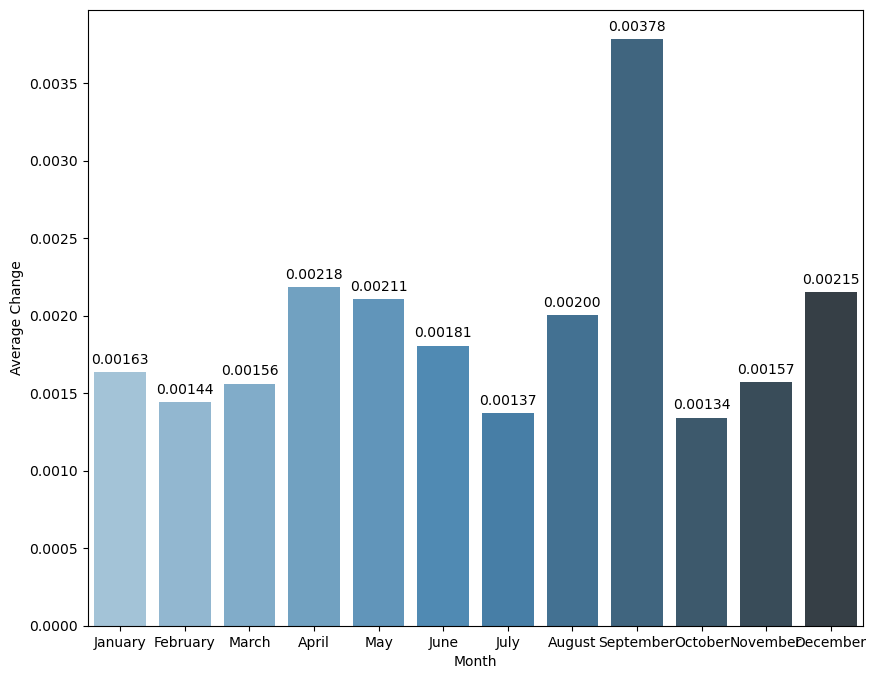

In [72]:
plt.figure(figsize=(10, 8))
y = [jan['CHANGE'].mean(), feb['CHANGE'].mean(), mar['CHANGE'].mean(),apr['CHANGE'].mean(), may['CHANGE'].mean(), jun['CHANGE'].mean(), jul['CHANGE'].mean(), aug['CHANGE'].mean(), sep['CHANGE'].mean(), otb['CHANGE'].mean(), nov['CHANGE'].mean(), dec['CHANGE'].mean()]
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
ax = sns.barplot(x=months, y=y, palette="Blues_d")

plt.xlabel('Month')
plt.ylabel('Average Change')

# Adding the value labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.5f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

# Displaying the plot
plt.show()

Month of September have most positive movement, Month of October have least positive movement.

In [16]:
t_val, p_val = ttest_ind(sep['CHANGE'], otb['CHANGE'], alternative = 'greater')
p_val

0.0019764896462134748

Result is significant

### Statistical Analysis on Hour
#### What hour seems to have biggest movement?

In [17]:
df['Hour'].unique()

array([13, 14, 15, 16,  9, 10, 11, 12])

In [18]:
d9 = df[df['Hour'] == 9]
d10 = df[df['Hour'] == 10]
d11 = df[df['Hour'] == 11]
d12 = df[df['Hour'] == 12]
d13 = df[df['Hour'] == 13]
d14 = df[df['Hour'] == 14]
d15 = df[df['Hour'] == 15]
d16 = df[df['Hour'] == 16]

In [19]:
print(d9['CHANGE'].mean())
print(d10['CHANGE'].mean())
print(d11['CHANGE'].mean())
print(d12['CHANGE'].mean())
print(d13['CHANGE'].mean())
print(d14['CHANGE'].mean())
print(d15['CHANGE'].mean())
print(d16['CHANGE'].mean())

-0.002390456444003745
0.002804747217379649
0.0013590633259017272
0.0022053951033572617
0.0024807860772060545
0.001852356341976155
0.0025809815950920143
0.005323575810692382


C:\Users\josh9\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\josh9\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\josh9\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\josh9\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_d

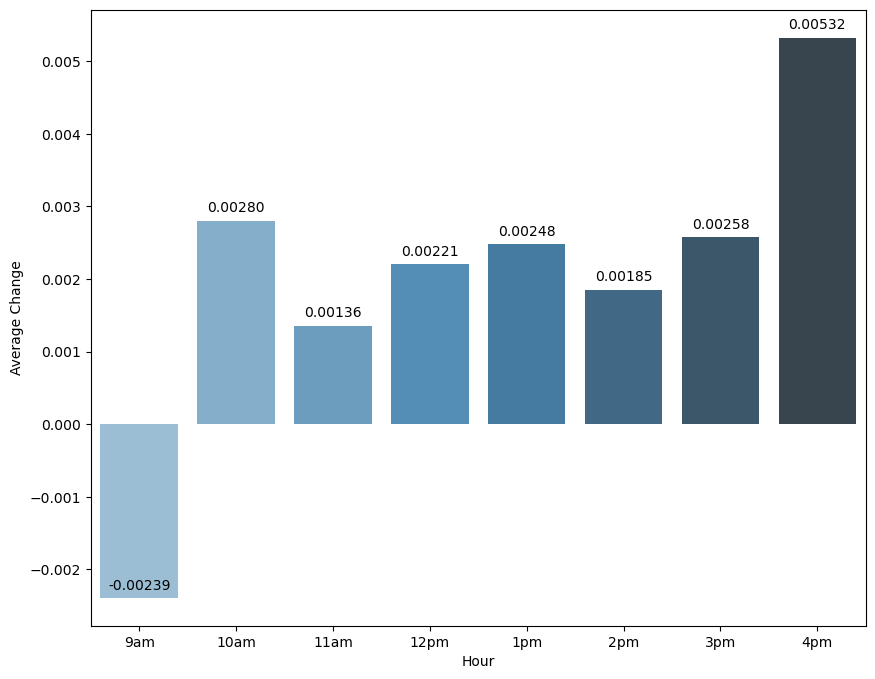

In [74]:
plt.figure(figsize=(10, 8))
y = [d9['CHANGE'].mean(), d10['CHANGE'].mean(), d11['CHANGE'].mean(), d12['CHANGE'].mean(), d13['CHANGE'].mean(), d14['CHANGE'].mean(), d15['CHANGE'].mean(), d16['CHANGE'].mean()]
hours = ['9am', '10am' ,'11am', '12pm', '1pm', '2pm', '3pm', '4pm']
ax = sns.barplot(x=hours, y=y, palette="Blues_d")

plt.xlabel('Hour')
plt.ylabel('Average Change')

# Adding the value labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.5f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

# Displaying the plot
plt.show()

Seems like the first hour tends to go down, last hour tends to go up

In [20]:
t_val, p_val = ttest_ind(d16['CHANGE'], d9['CHANGE'], alternative = 'greater')
p_val

0.0016442065465435342

### If MA Above stock, does it tend to go down? 

MA50 (50 - Day Moving Average): Indicator that tracks the average of a stock’s closing prices over the last 50 periods. If the MA50 is above the current price of a stock, it often suggests that the stock might be in a downtrend and vice versa.

MA50 > Closing price, indicate downtrend, MA50 < closing price, indicate uptrend

Filter data for Closing > MA50 and Closing < MA50

In [35]:
above = df[df['CLOSE'] > df['MA50']]
below = df[df['CLOSE'] < df['MA50']]

In [39]:
print("Average change in price, MA50 > Closing: " + str(above['CHANGE'].mean()))
print("Average change in price, MA50 < Closing: " + str(below['CHANGE'].mean()))

Average change in price, MA50 > Closing: -0.008464900332601782
Average change in price, MA50 < Closing: 0.012110394488276461


In [37]:
t_val, p_val = ttest_ind(above['CHANGE'], below['CHANGE'], alternative = 'less')
p_val

0.0

Interestingly, when MA50 is above the closing price, the average change is negative, when MA50 is below the closing price, the average change is positive. A p-value of 0 suggests that it’s statistically significant.


### MACD has MACD value and MACD Signal, When the MACD line crosses above the MACD Signal line, it’s often a bullish (going up) signal and when it cross below, it’s a bearish (going down) signal.

Filter data for when MACD > MACD_Signal, and when MACD < MACD_Signal

In [42]:
above0 = df[df['MACD'] > df['MACD_SIGNAL']]
below0 = df[df['MACD'] < df['MACD_SIGNAL']]

In [49]:
print("Average change in price, MACD > MACD_SIGNAL: " + str(above0['CHANGE'].mean()))
print("Average change in price, MACD < MACD_SIGNAL: " + str(below0['CHANGE'].mean()))

Average change in price, MACD > MACD_SIGNAL: 0.002265863786190238
Average change in price, MACD < MACD_SIGNAL: 0.001695112532596734


In [48]:
t_val, p_val = ttest_ind(above0['CHANGE'], below0['CHANGE'], alternative = 'greater')
p_val

0.03774922162490109

When MACD > MACD_Signal, average change is greater

# Attempting to build Regressors

### Random Forest

In [76]:
df

,OPEN,HIGH,LOW,CLOSE,VOLUME,RSI,MONTH,DOW,CHANGE,MACD,MACD_HIST,MACD_SIGNAL,MA50,MA5,VWAP,Hour
43,0.226,0.230,0.226,0.229,17214400,55.5547,1,2,-0.003,0.0002,0.0001,0.0001,0.2252,0.2258,0.2251,13
44,0.229,0.230,0.228,0.229,9469600,71.0531,1,2,0.000,0.0004,0.0003,0.0001,0.2253,0.2264,0.2253,13
45,0.228,0.230,0.228,0.228,1696800,63.1484,1,2,0.000,0.0006,0.0003,0.0002,0.2253,0.2270,0.2253,13
46,0.228,0.230,0.225,0.226,14744800,63.1484,1,2,0.002,0.0006,0.0003,0.0003,0.2254,0.2274,0.2254,13
47,0.227,0.229,0.226,0.227,2480800,55.9318,1,2,0.000,0.0006,0.0003,0.0004,0.2255,0.2276,0.2254,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91791,178.730,178.750,178.533,178.585,487972,57.1998,10,2,0.145,-0.0083,0.0927,-0.1010,178.8217,178.6170,178.7920,15
91792,178.585,178.740,178.540,178.630,515934,52.2100,10,2,-0.045,-0.0007,0.0802,-0.0810,178.8037,178.6730,178.7896,15
91793,178.630,178.680,178.530,178.610,557809,53.5639,10,2,0.020,0.0088,0.0718,-0.0630,178.7866,178.6870,178.7865,15
91794,178.610,178.660,178.120,178.230,1652985,52.8473,10,2,0.380,0.0146,0.0621,-0.0475,178.7687,178.6690,178.7656,15


One hot encode the Month, DOW, Hour column since they are categorical

In [77]:
from sklearn.preprocessing import OneHotEncoder
columns_to_encode = df[['MONTH', 'DOW', 'Hour']]
encoder = OneHotEncoder(sparse = False)
encoded_data = encoder.fit_transform(columns_to_encode)
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(columns_to_encode.columns))

C:\Users\josh9\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [78]:
df = df.reset_index(drop = True)
df = pd.concat([df, encoded_df], axis=1)
y = df['CHANGE']

Dropping more unneeded columns

In [ ]:
df2 = df.drop(columns = ['CHANGE', 'MONTH', 'DOW', 'Hour', 'HIGH', 'OPEN', 'CLOSE'])

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.3, random_state=42)

In [80]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, mean_absolute_error
base = RandomForestRegressor(max_depth = 4, n_jobs = -1)

In [81]:
base.fit(X_train, y_train)
y_pred_train = base.predict(X_train)
y_pred_test = base.predict(X_test)
print('Training R2 score:', r2_score(y_train, y_pred_train))
print('Testing R2 score:', r2_score(y_test, y_pred_test))

Training R2 score: 0.010847042498987491
Testing R2 score: -0.00044829549008928993


Text(0, 0.5, 'Actual')

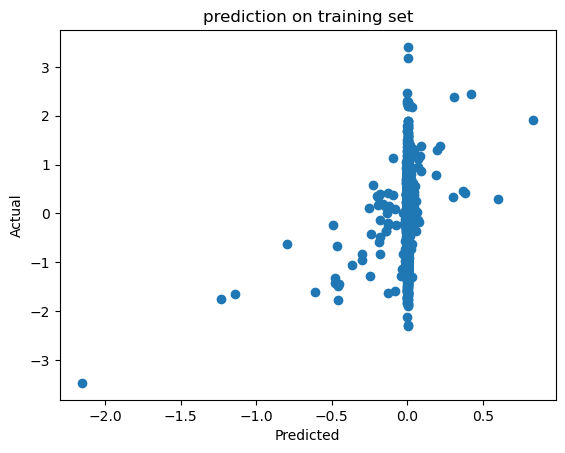

In [82]:
plt.scatter(y_pred_train, y_train)
plt.title('prediction on training set')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Text(0, 0.5, 'Actual')

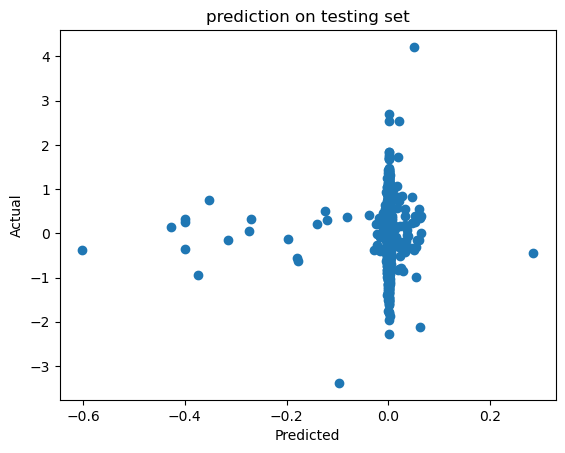

In [83]:
plt.scatter(y_pred_test, y_test)
plt.title('prediction on testing set')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Predicts a lot of net movement of 0, now we run feature selection and hyperparameter tuning

In [84]:
importance = base.feature_importances_
importance

array([7.90354674e-03, 5.09210500e-02, 9.40947002e-02, 1.75789357e-02,
       2.08751903e-01, 5.45355866e-01, 3.69227089e-02, 6.76658452e-03,
       8.10160020e-03, 5.83641051e-03, 1.16604834e-03, 3.04755542e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.68801765e-03, 0.00000000e+00, 3.12847854e-03, 0.00000000e+00,
       7.66440137e-04, 3.72474566e-04, 1.01985131e-03, 2.58295183e-03,
       1.48846885e-03, 1.01545054e-03, 0.00000000e+00, 0.00000000e+00,
       1.49095641e-03, 0.00000000e+00, 0.00000000e+00])

In [86]:
important_feature_indices = importance.argsort()[::-1][:20]
important_feature_indices

array([ 5,  4,  2,  1,  6,  3,  8,  0,  7,  9, 22, 11, 27, 20, 32, 28, 10,
       26, 29, 24], dtype=int64)

### Selected Features

In [87]:
X_train, X_test, y_train, y_test = train_test_split(df2.iloc[:, important_feature_indices], y, test_size=0.3, random_state=42)

In [88]:
base.fit(X_train, y_train)
y_pred_train = base.predict(X_train)
y_pred_test = base.predict(X_test)
print('Training R2 score:', r2_score(y_train, y_pred_train))
print('Testing R2 score:', r2_score(y_test, y_pred_test))

Training R2 score: 0.011061204746216524
Testing R2 score: -0.001674403024144011


Text(0, 0.5, 'Actual')

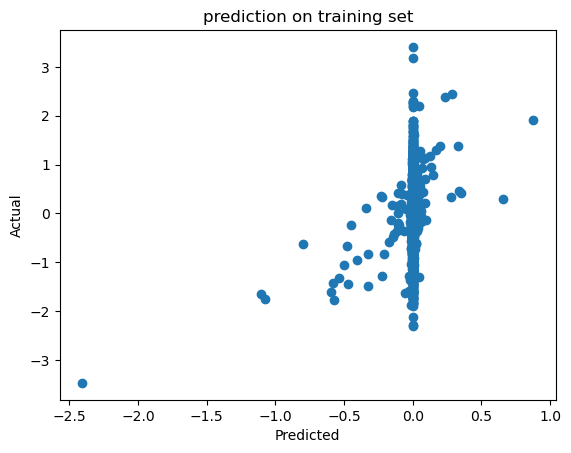

In [89]:
plt.scatter(y_pred_train, y_train)
plt.title('prediction on training set')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Text(0, 0.5, 'Actual')

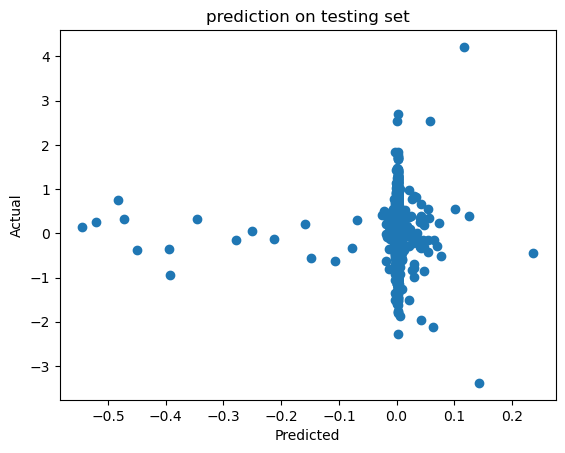

In [90]:
plt.scatter(y_pred_test, y_test)
plt.title('prediction on testing set')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Still predicting a lot of 0, maybe a tree is not cut out for this, will try LSTM since LSTM remembers information from the past.

### LSTM

In [96]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [101]:
df2

,OPEN,CLOSE,VOLUME,RSI,MACD,MACD_HIST,MACD_SIGNAL,MA50,MA5,VWAP,...,DOW_4,DOW_5,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16
0,0.226,0.229,17214400,55.5547,0.0002,0.0001,0.0001,0.2252,0.2258,0.2251,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.229,0.229,9469600,71.0531,0.0004,0.0003,0.0001,0.2253,0.2264,0.2253,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.228,0.228,1696800,63.1484,0.0006,0.0003,0.0002,0.2253,0.2270,0.2253,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.228,0.226,14744800,63.1484,0.0006,0.0003,0.0003,0.2254,0.2274,0.2254,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.227,0.227,2480800,55.9318,0.0006,0.0003,0.0004,0.2255,0.2276,0.2254,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447479,178.730,178.585,487972,57.1998,-0.0083,0.0927,-0.1010,178.8217,178.6170,178.7920,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
447480,178.585,178.630,515934,52.2100,-0.0007,0.0802,-0.0810,178.8037,178.6730,178.7896,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
447481,178.630,178.610,557809,53.5639,0.0088,0.0718,-0.0630,178.7866,178.6870,178.7865,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
447482,178.610,178.230,1652985,52.8473,0.0146,0.0621,-0.0475,178.7687,178.6690,178.7656,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [100]:
target1 = pd.DataFrame(y)

In [105]:
def create_sequences(data, target1, seq_length):
    sequences = []
    target = []
    for i in range(len(data) - seq_length - 1):
        sequences.append(data[i:i+seq_length].values)
        target.append(target1.iloc[i+seq_length]['CHANGE'])
    return tf.convert_to_tensor(sequences), tf.convert_to_tensor(target)

In [106]:
len(df2) * 0.7, len(df2) * 0.8

(313238.8, 357987.2)

In [138]:
df_all, df_target = create_sequences(df2, target1,40)

In [139]:
Xtrain, Ytarget = df_all[0:313239], df_target[0:313239]
Xval, Yval = df_all[313239:357987], df_target[313239:357987]
Xtest, Ytest = df_all[357987:], df_target[357987:]

In [140]:
params = {
"loss": "mean_squared_error",
"optimizer": "adam",
"dropout": 0.2,
"lstm_units": 128,
"epochs": 30,
"batch_size": 128,
"es_patience" : 10
}

In [147]:
model = Sequential()
model.add(LSTM(units=params["lstm_units"], return_sequences=True, input_shape=(40,35)))
model.add(Dropout(rate=params["dropout"]))

model.add(LSTM(units=params["lstm_units"], return_sequences=True))
model.add(Dropout(rate=params["dropout"]))

model.add(LSTM(units=params["lstm_units"], return_sequences=True))
model.add(Dropout(rate=params["dropout"]))

model.add(LSTM(units=params["lstm_units"], return_sequences=True))
model.add(Dropout(rate=params["dropout"]))
model.add(LSTM(units=params["lstm_units"], return_sequences=True))
model.add(Dropout(rate=params["dropout"]))

model.add(LSTM(units=params["lstm_units"], return_sequences=True))
model.add(Dropout(rate=params["dropout"]))

model.add(LSTM(units=params["lstm_units"], return_sequences=True))
model.add(Dropout(rate=params["dropout"]))

model.add(LSTM(units=params["lstm_units"], return_sequences=False))
model.add(Dropout(rate=params["dropout"]))

model.add(Dense(units = 50, activation = 'relu'))

model.add(Dense(1))

model.compile(optimizer=Adam(), loss = 'mean_squared_error')

In [148]:
model.fit(Xtrain, Ytarget,validation_data = (Xval, Yval), epochs = 10, batch_size=64)

Epoch 1/10
 385/4895 [=>............................] - ETA: 9:49 - loss: 4.0735e-04

KeyboardInterrupt: 

In [143]:
predictions = model.predict(Xtrain).flatten()

9789/9789 [==============================] - 136s 14ms/step


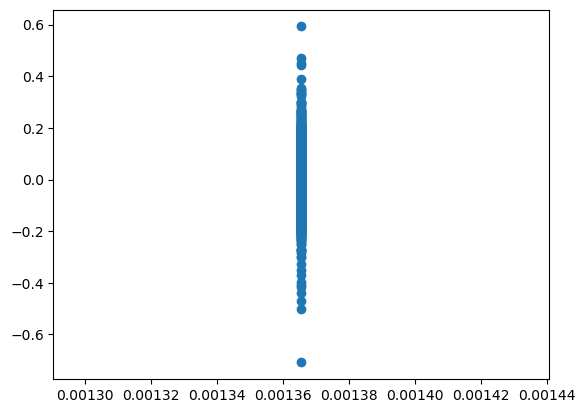

In [146]:
plt.scatter(np.array(predictions), np.array(Ytarget))